In [1]:
import math
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import Counter

In [101]:
# Simpson's_diversity_index
def simpson_diversity_index(data):
    my_list = []
    for key,value in data.items():
        my_list.append(value)
        #print(my_list)
        summ =0
        sum_of_i=0
    for i in my_list:
        summ = summ+(i*(i-1))
        sum_of_i = sum_of_i +i 
        #print (sum_of_i)
    #print('sum:')
    #print(summ)
    #print (sum_of_i)
    #print((sum_of_i)*(sum_of_i-1))
    sdi = 1-(summ/((sum_of_i)*(sum_of_i-1)))
    print (sdi)
    return sdi

1.0
0.9976856722070271
0.9966452334358401
0.9965986394557823
0.9961525593844095
0.9963548559355483
0.9960786319540348
0.9961114880734903
0.9960111317254174
0.9959684487291849
0.9959445758702264
0.9959033016954653
0.9957643434732384
0.9957651465174182
0.9958331016330237
0.995722235254255
0.9957002031581863
0.9957067957716571
0.9956873751198272
0.9956557086573138
0.9956419477184982
0.9957106164826022
0.9957478396409146
0.995682443190042
0.9956595971722022
0.9956455843561668
0.9956626792589619
0.9956427710190047
0.9956180432347781
0.9955877245384198


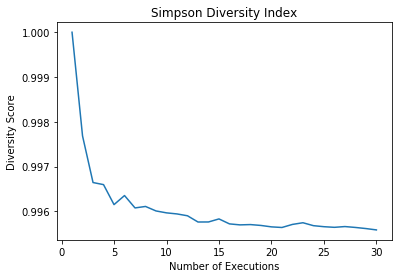

In [102]:
#Important Feature 
path = r'D:/input output csv_png' # useing my csv path
all_files = glob.glob(path + "/*.csv")

list_csv = []

count_list = []
sdf_list = []
features = []
count = 0
for filename in all_files:
    count =count+1
    df = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    columns = df.f_name.tolist()
    
    features= np.hstack([features, columns])
    count_feature_name =Counter(features)
    count_list.append(count)
    #print((dict(count_feature_name)))
    sdf_list.append(simpson_diversity_index(dict(count_feature_name)))
    #print (sdf_list)    
    
plt.title('Simpson Diversity Index')
plt.xlabel('Number of Executions')
plt.ylabel('Diversity Score')

  
plt.plot(count_list, sdf_list)
plt.savefig('D:/input output csv_png/PNG/simpson_diversity_index.png')
plt.show()



In [4]:
# Shanon_diversity_index

def Shanon_diversity_index(data):
    my_list = []
    total_population =0.0
    for key,value in data.items():
        #print("value:", value)
        #print (key)
        my_list.append(value)
        total_population = total_population + value
    #print (total_population)
    
    probs = [float(c) / (total_population) for c in my_list]
    #print(my_list)
    #print(probs)
    s_entropy = 0.0
    sum_pi = 0.0
    sum_ln_X_pi = 0.0
    for p in probs:
        sum_pi = sum_pi+p
        #print("sum_pi",sum_pi)
        sum_ln_X_pi = sum_ln_X_pi +(math.log(p))
      
    #print("sum_pi",sum_pi)
    #print("sum_ln_X_pi",sum_ln_X_pi)
    #print(p)
    #print("...............")
    s_entropy = -1* (sum_pi)*(sum_ln_X_pi)
    #s_entropy =-1*s_entropy
    print("s_entropy",s_entropy)
    return s_entropy

    

s_entropy 190.69919460742074
s_entropy 190.69919460742074
190.69919460742074
s_entropy 391.26755165818105
s_entropy 391.26755165818105
391.26755165818105
s_entropy 558.841027831235
s_entropy 558.841027831235
558.841027831235
s_entropy 764.6187918082186
s_entropy 764.6187918082186
764.6187918082186
s_entropy 917.562228319312
s_entropy 917.562228319312
917.562228319312
s_entropy 1129.718095641238
s_entropy 1129.718095641238
1129.718095641238
s_entropy 1265.405297861693
s_entropy 1265.405297861693
1265.405297861693
s_entropy 1413.8301468037496
s_entropy 1413.8301468037496
1413.8301468037496
s_entropy 1532.1386113838307
s_entropy 1532.1386113838307
1532.1386113838307
s_entropy 1665.5230612919984
s_entropy 1665.5230612919984
1665.5230612919984
s_entropy 1785.651497724251
s_entropy 1785.651497724251
1785.651497724251
s_entropy 1908.2863833047256
s_entropy 1908.2863833047256
1908.2863833047256
s_entropy 1983.9906418826604
s_entropy 1983.9906418826604
1983.9906418826604
s_entropy 2093.25930590

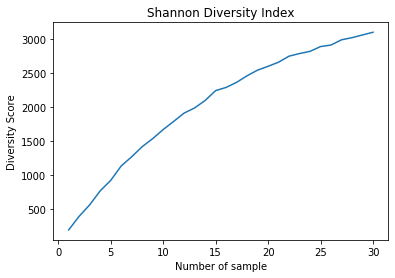

In [5]:
#Import Important Feature 
path = r'D:/input output csv_png' # useing my csv path
all_files = glob.glob(path + "/*.csv")

list_csv = []

features = []
shanon_d = []
count_list_com = []
count = 0
for filename in all_files:
    count =count+1
    df = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    columns = df.f_name.tolist()
    count_list_com.append(count)
    #print("Features Name:",columns)
    #print(count)
    features= np.hstack([features, columns])
    #print(np.array(features))
    feature_name_count =Counter(features)
    shanon= Shanon_diversity_index(dict(feature_name_count))
    shanon_d.append(Shanon_diversity_index(dict(feature_name_count)))
    print(shanon)

plt.title('Shannon Diversity Index')
plt.xlabel('Number of sample')
plt.ylabel('Diversity Score')

plt.plot(count_list_com, shanon_d)
plt.savefig('D:/input output csv_png/PNG/Shanon_diversity_index.png')
plt.show()

In [2]:
from collections import Counter
def Jaccard_similarity_coefficient(a,b):
#     my_list = []
#     total_population =0.0
#     my_list.append(value)
#     """Jaccard similarity measure between input iterables,
#     allowing repeated elements"""
    _a = Counter(a)
    _b = Counter(b)
    setA = set(a)
    setB = set(b)
    AuniB = setA.union(setB)
    AintB = setA.intersection(setB)
    inte =(len(AintB))
    unin =(len(AuniB))
    #print (len(AintB) - len(AuniB)
    in_uni = unin -inte
    div = in_uni / unin
    #print ('i_u',in_uni )
    #print ('d',div)
    #print ('i',inte)
    #print ('u',unin)
    
   
    return 1-((len(AuniB) - len(AintB))/len(AuniB))


#list3 = ['dog', 'cat', 'cat','mouse'] 

count 1
1.0
count 2
0.5632183908045977
count 3
0.4224137931034483
count 4
0.32666666666666666
count 5
0.2816091954022989
count 6
0.23671497584541068
count 7
0.21585903083700442
count 8
0.19678714859437751
count 9
0.1842105263157895
count 10
0.1719298245614035
count 11
0.16225165562913912
count 12
0.15360501567398122
count 13
0.14893617021276595
count 14
0.1424418604651163
count 15
0.13461538461538458
count 16
0.1324324324324324
count 17
0.1289473684210526
count 18
0.12468193384223913
count 19
0.12128712871287128
count 20
0.11922141119221408
count 21
0.116945107398568
count 22
0.11368909512761016
count 23
0.11238532110091748
count 24
0.11136363636363633
count 25
0.10913140311804004
count 26
0.1084070796460177
count 27
0.10606060606060608
count 28
0.1051502145922747
count 29
0.10403397027600847
count 30
0.1029411764705882


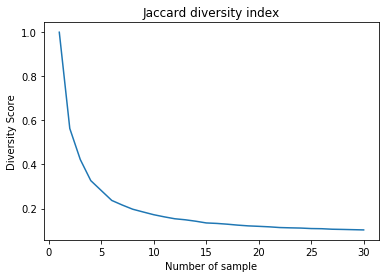

In [3]:
#Import Important Feature 
path = r'D:/input output csv_png' # useing my csv path
all_files = glob.glob(path + "/*.csv")

list_1 = []
list_2 = []
features = []
cout_j_list = []
jaccard_s =[]
count = 0
flg = 0
for filename in all_files:
    count =count+1
    print ("count",count)
    df = pd.read_csv(filename, index_col=False, usecols=["f_name", "score"])
    columns = df.f_name.tolist()
    list_1.append(columns)
    cout_j_list.append(count)
    #print("Features Name:",columns)
    #print(count)
    features= np.hstack([features, columns])
    if flg == 0:
        jaccard_similarity=Jaccard_similarity_coefficient(features, features)
        flg = 1
        jaccard_s.append(jaccard_similarity)
    else:
        jaccard_similarity=Jaccard_similarity_coefficient(features, columns)
        jaccard_s.append(jaccard_similarity)
        
        
    print(jaccard_similarity)
   # print ("count",count)
    
    #print(np.array(features))
#     asd =Counter(features)
#     simson = simpson_di(dict(asd))
#     print(simson)
#     #shannon = eta(np.array(features))
#     #print (shannon)
    #list_csv.append(df)
    #list_every_iteration = pd.concat(list_csv, axis=0, ignore_index=False)
plt.title('Jaccard diversity index')
plt.xlabel('Number of sample')
plt.ylabel('Diversity Score')

plt.plot(cout_j_list, jaccard_s)
plt.savefig('D:/input output csv_png/PNG/Jaccard_similarity_coefficient.png')
plt.show()